# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

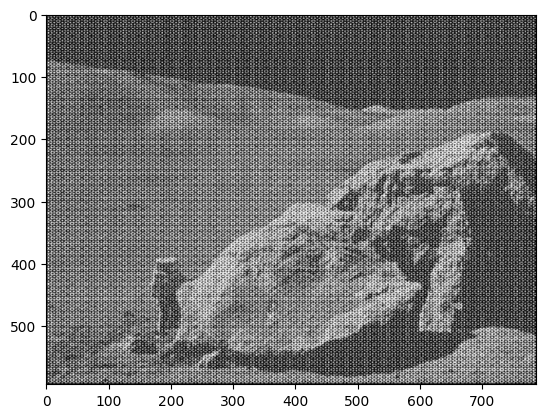

In [11]:
img = cv.imread('periodic_noise.JPG', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [9]:
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [22]:
sigma = 30
rows, cols = img.shape

x, y = np.meshgrid(np.arange(0, img.shape[1], 1), np.arange(0, img.shape[0], 1))

gauss_mask = np.exp(-((x - (img.shape[1] // 2)) ** 2 + (y - (img.shape[0] // 2)) ** 2) / (2 * sigma ** 2))
mask = 1 - gauss_mask

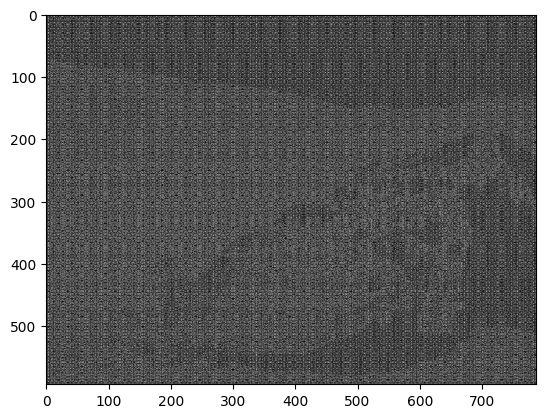

In [23]:
dft_shift = dft_shift * mask[:, :, np.newaxis]

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])
plt.imshow(img_back, cmap='gray')

# Реализуйте удаление периодического шума

In [30]:
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [33]:
magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
local_max = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=200)
mask = np.copy(dft_shift)
mask[:, :, :] = 1

for i in local_max:
    r = np.int32(((i[0] - img.shape[0] // 2) ** 2 + (i[1] - img.shape[1] // 2) ** 2) ** (1 / 2))
    cv.circle(mask, (img.shape[0] // 2, img.shape[1] // 2), r, (0, 0))

/tmp/ipython-input-4072108593.py:1: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


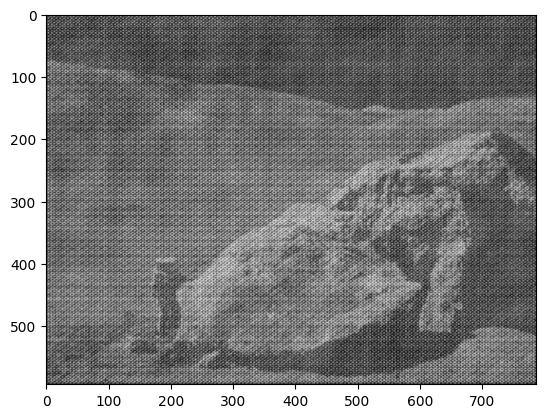

In [34]:
dft_shift = dft_shift * mask

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])
plt.imshow(img_back, cmap='gray')